# Assignment 4:  Web Scraping Exercise

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

We are going to retrieve a list of all the CORGIS CSV Datasets.  To do this, include the following steps in the cell below:
* Import requests and BeautifulSoup
* Use `requests.get` to retrieve the html code of the CORGIS [CSV Datasets](https://corgis-edu.github.io/corgis/csv/) webpage
* Use `BeautifulSoup` to parse the html and create a list containing all occurrences of the "h3" html tag
  * Look at the page source of the above link to identify why it makes sense to search for the \<h3\> tags in the page
* Using the list of h3 tags, make a Python list of all the dataset names and store it in the variable `corgis_list`.  
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [1]:
import requests
from bs4 import BeautifulSoup

# get the HTML code from the CORGIS CSV Datasets webpage
url = 'https://corgis-edu.github.io/corgis/csv/'
response = requests.get(url)

# parse the HTML using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# find all occurrences of the "h3" HTML tag
h3_tags = soup.find_all('h3')

# extrat dataset names from the h3 tags and store in corgis_list
corgis_list = [tag.text for tag in h3_tags]

# print the list of dataset names
print(corgis_list)

['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']


Write a function that takes an element from `corgis_list`, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If you define a function `pdcorgis` and want to call it with Python code like `classics_data = pdcorgis(corgis_list[0])`, then an example set of Python commands inside the function could be:
  1. Convert the dataset name to lowercase [Note that `a.lower()` will give a lowercase version of the string `a`]
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" 
  1. Use `BeautifulSoup` to find all the HTML links on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), test whether `i.has_attr('download')` is true or false; if it is true, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the dataset name plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a `return` statement to return the dataframe from your function.  [For example, if I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function]
    

In [2]:
import pandas as pd

def pdcorgis(dataset_name):
    # convert dataset name to lowercase
    dataset_name = dataset_name.lower()
    
    # get the HTML code from the dataset's webpage
    url = f'https://corgis-edu.github.io/corgis/csv/{dataset_name}/'
    response = requests.get(url)
    
    # parse the HTML using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # find all occurrences of the "a" HTML tag
    a_tags = soup.find_all('a')
    
    # find the download link for the CSV file
    csv_link = None
    for tag in a_tags:
        if tag.has_attr('download'):
            csv_link = tag['href']
            break
    
    # complete download link for the CSV file
    csv_url = f'https://corgis-edu.github.io/corgis/csv/{dataset_name}/{csv_link}'
    
    # read the CSV file into a Pandas df
    dataframe = pd.read_csv(csv_url)
    
    # return the df
    return dataframe

Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [3]:
"""
To confirm the function's accuracy, I tested it with the 10th dataset in the corgis_list, which corresponds to the 
"Coffee" dataset. To validate the function, I executed pdcorgis(corgis_list[9]).head() which printed the first five 
rows of the dataframe. The output contained reasonable data with descriptive column names such as Location.Country,
Location.Region, Data.Owner, Data.Type.Species, and various coffee quality scores like Data.Scores.Flavor, 
Data.Scores.Aftertaste, and Data.Scores.Acidity. The data types and values in the dataframe are consistent 
with what one would expect from a coffee dataset, indicating that the function is working correctly.

Furthermore, manual comparison with the CORGIS website for the Coffee dataset confirmed that the data retrieved 
by the function matched the data available online. Therefore, I ensured that the function accurately scrapes 
and processes data from the CORGIS website.
"""

print(pdcorgis(corgis_list[9]).head())

  Location.Country                Location.Region  Location.Altitude.Min  \
0    United States                           kona                      0   
1           Brazil  sul de minas - carmo de minas                     12   
2           Brazil  sul de minas - carmo de minas                     12   
3         Ethiopia                         sidamo                      0   
4         Ethiopia                         sidamo                      0   

   Location.Altitude.Max  Location.Altitude.Average  Year  \
0                      0                          0  2010   
1                     12                         12  2010   
2                     12                         12  2010   
3                      0                          0  2010   
4                      0                          0  2010   

                         Data.Owner Data.Type.Species Data.Type.Variety  \
0  kona pacific farmers cooperative           Arabica               NaN   
1          jacques pereira

Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

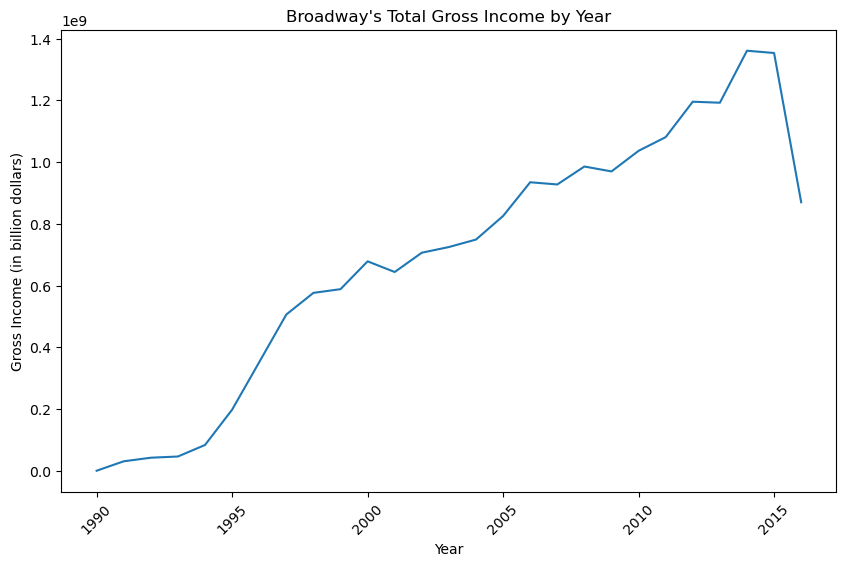

In [4]:
import matplotlib.pyplot as plt

# get the Broadway dataset
broadway_df = pdcorgis('Broadway')

# Inspect the dataset 
#print(broadway_df.head())

# grouping by Year and summing the Statistics.Gross Income for each year
broadway_grouped = broadway_df.groupby('Date.Year')['Statistics.Gross'].sum().reset_index()

# plotting the data
plt.figure(figsize=(10, 6))
plt.plot(broadway_grouped['Date.Year'], broadway_grouped['Statistics.Gross'])
plt.xlabel('Year')
plt.ylabel('Gross Income (in billion dollars)')
plt.title('Broadway\'s Total Gross Income by Year')
plt.xticks(rotation=45)
plt.show()

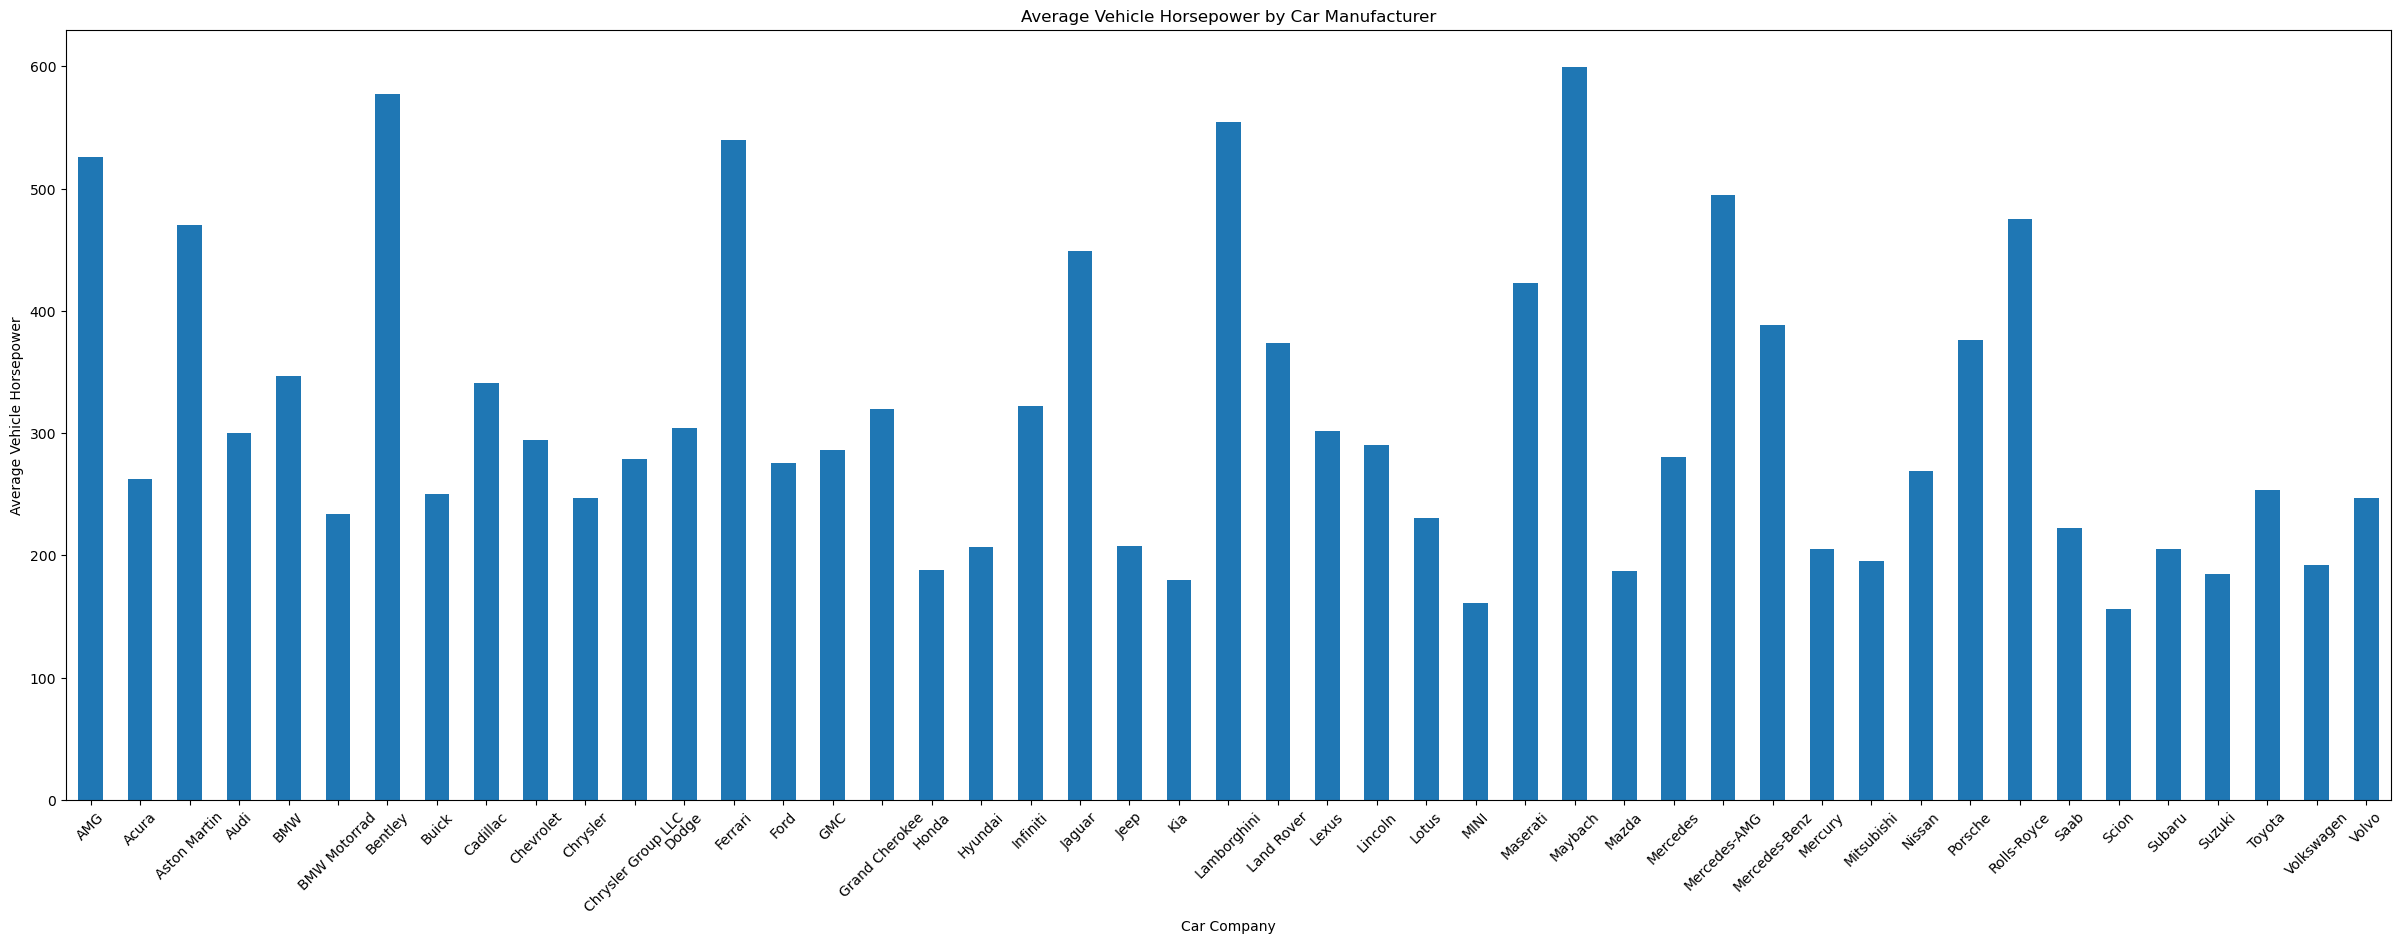

In [8]:
import matplotlib.pyplot as plt

# get the Cars dataset
cars_data = pdcorgis('Cars')

# Calculate the average horsepower for all vehicles from each company
average_horsepower = cars_data.groupby('Identification.Make')['Engine Information.Engine Statistics.Horsepower'].mean()

# Create a bar plot for the average horsepower
plt.figure(figsize=(30, 10))
average_horsepower.plot(kind='bar', title='Average Vehicle Horsepower by Car Manufacturer')
plt.xlabel('Car Company')
plt.ylabel('Average Vehicle Horsepower')
plt.xticks(rotation=45)
plt.show()

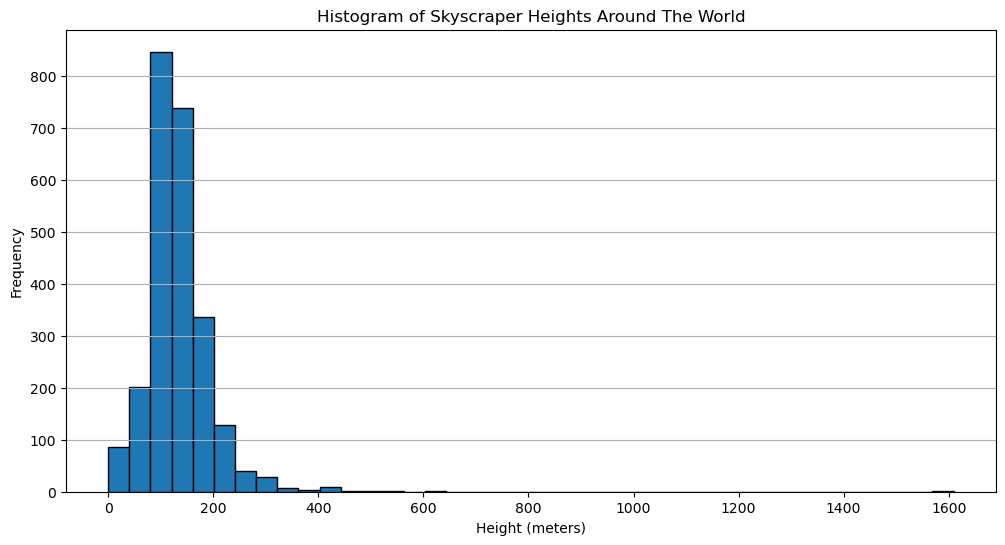

In [6]:
import matplotlib.pyplot as plt

# get the skyscraper dataset
skyscraper_data = pdcorgis('Skyscrapers')

# Plot the histogram for skyscraper heights
plt.figure(figsize=(12, 6))
plt.hist(skyscraper_data['statistics.height'], bins=40, edgecolor='k')
plt.title('Histogram of Skyscraper Heights Around The World')
plt.xlabel('Height (meters)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top